In [21]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart failure.csv")

In [11]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

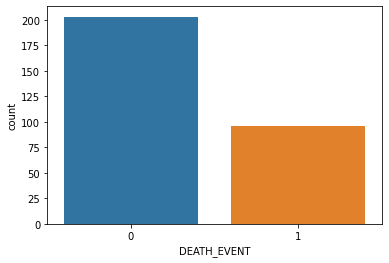

In [6]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

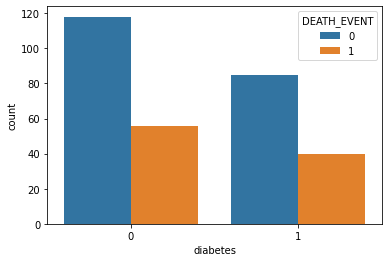

In [7]:
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

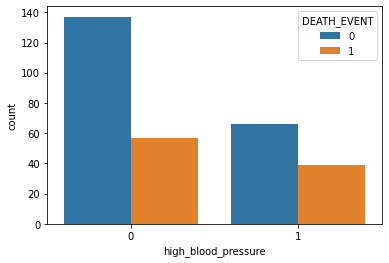

In [8]:
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

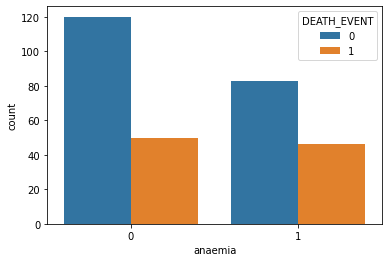

In [9]:
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

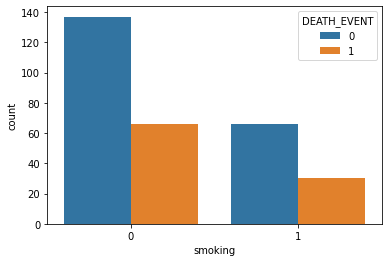

In [10]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

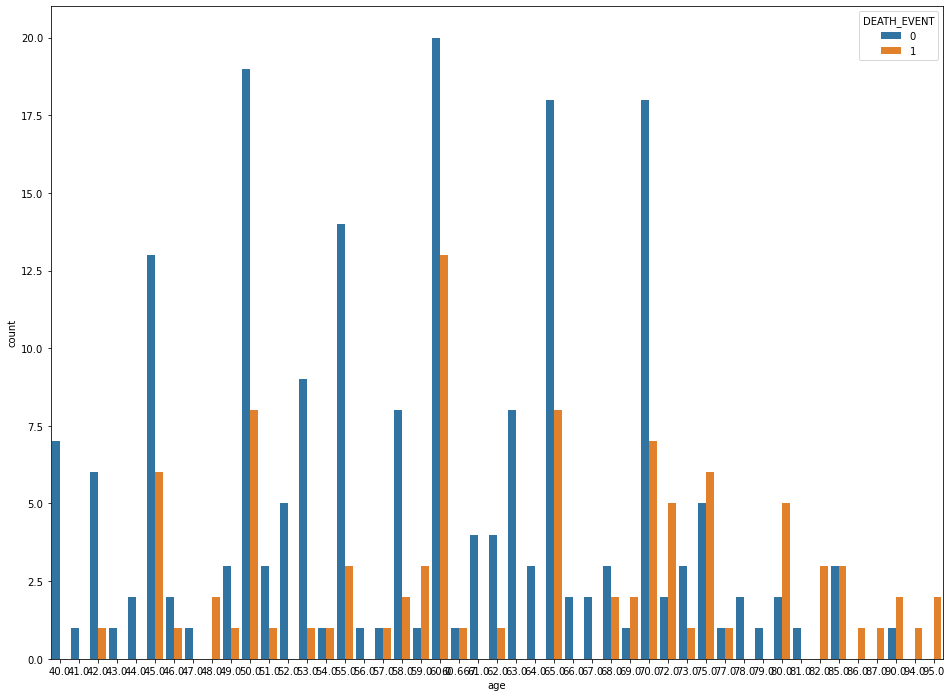

In [13]:
plt.figure(figsize=(16,12))
sns.countplot(x='age', hue='DEATH_EVENT', data=df)

In [14]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation for Every Column'}>

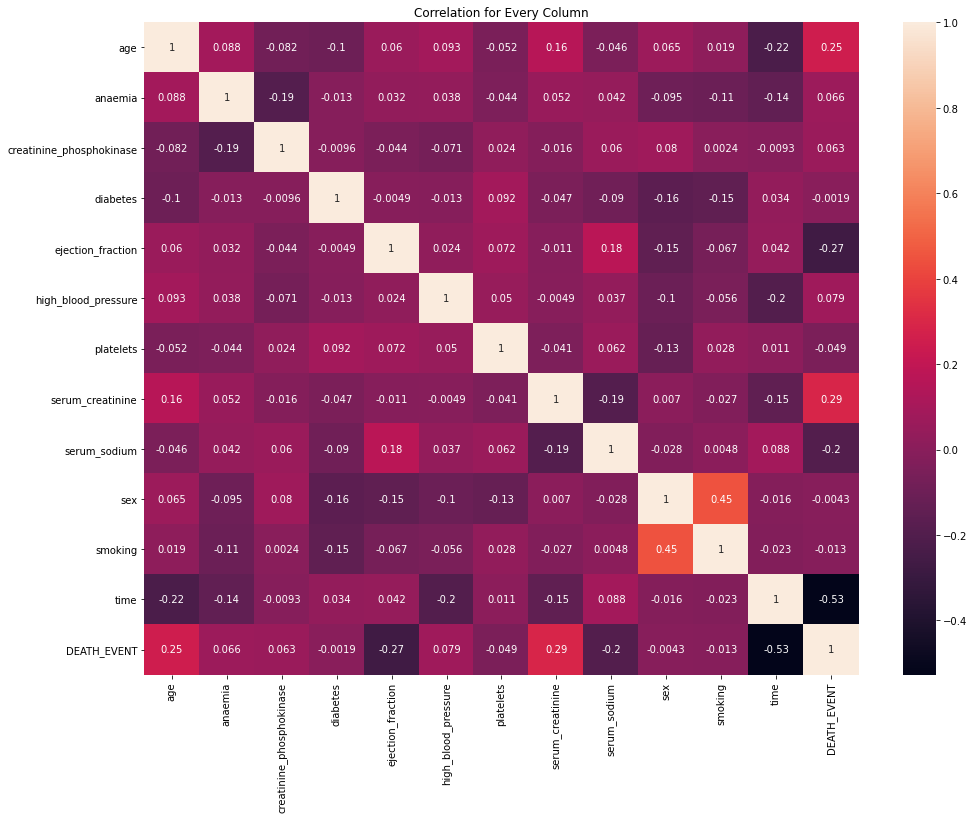

In [15]:
plt.figure(figsize=(16,12))
plt.title('Correlation for Every Column')
sns.heatmap(df.corr() , annot=True)

# Seperate X, Y

In [16]:
x = df.drop('DEATH_EVENT', axis='columns')

In [17]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [18]:
y = df['DEATH_EVENT']

In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Split the dataset into train and test

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=23)

In [26]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
92,42.0,0,582,0,60,0,263358.03,1.18,137,0,0,82
67,72.0,1,110,0,25,0,274000.00,1.00,140,1,1,65
228,65.0,0,56,0,25,0,237000.00,5.00,130,0,0,207
97,70.0,1,59,0,60,0,255000.00,1.10,136,0,0,85
208,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187


In [31]:
ytrain.head()

92     0
67     1
228    0
97     0
208    0
Name: DEATH_EVENT, dtype: int64

In [27]:
xtrain.shape

(209, 12)

In [28]:
xtest.shape

(90, 12)

In [29]:
classifier = DecisionTreeClassifier()

In [30]:
classifier.fit(xtrain, ytrain)

DecisionTreeClassifier()

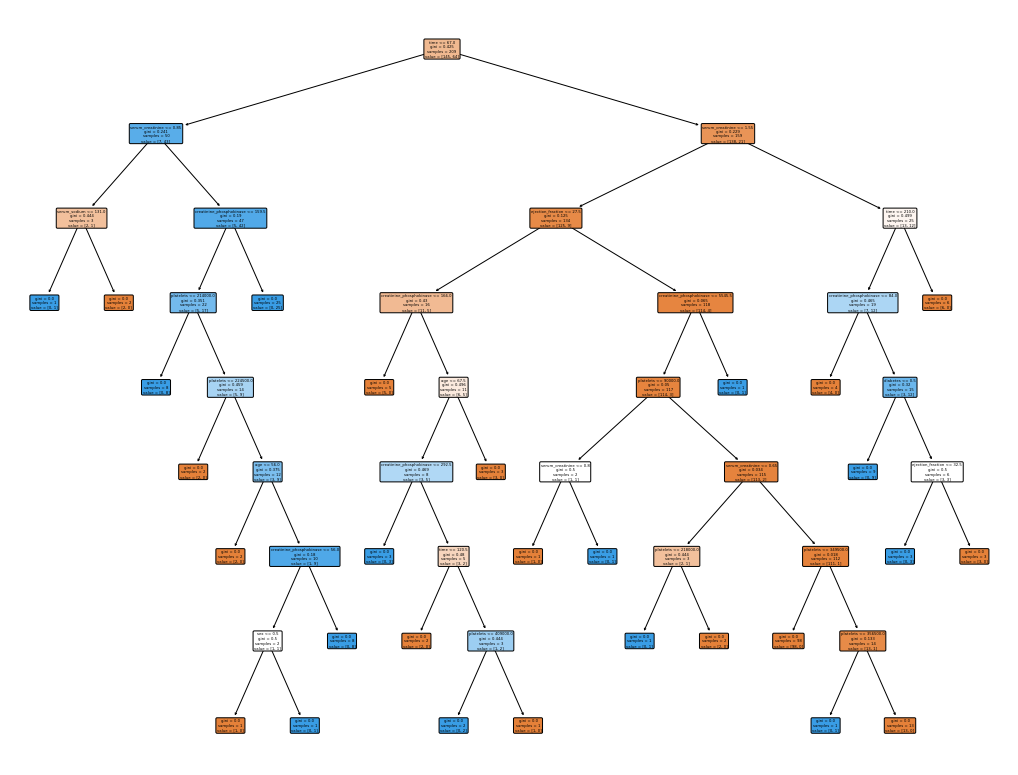

In [41]:
from sklearn import tree
plt.figure(figsize=(18,14))
tree.plot_tree(classifier, filled=True, rounded=True, feature_names=x.columns)
plt.savefig('tree.pdf')
plt.savefig('tree.png')

<Figure size 432x288 with 0 Axes>

In [42]:
pred = classifier.predict(xtest)

In [44]:
pred # predicted result

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [45]:
np.array(ytest) # actual result

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0])

# Confusion Matrix

In [ ]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [46]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.83      0.81        58\n           1       0.66      0.59      0.62        32\n\n    accuracy                           0.74        90\n   macro avg       0.72      0.71      0.71        90\nweighted avg       0.74      0.74      0.74        90\n'

In [47]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        58
           1       0.66      0.59      0.62        32

    accuracy                           0.74        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.74      0.74      0.74        90



In [59]:
cm = confusion_matrix(ytest,pred)

In [60]:
cm

array([[48, 10],
       [13, 19]])

Text(0.5, 1.0, 'Confusion Matrix')

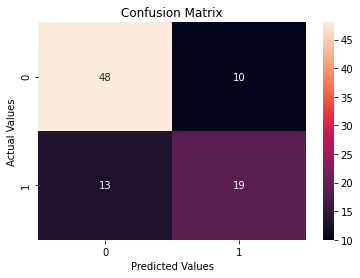

In [61]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [51]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [63]:
tp

48

In [62]:
fn

10

In [64]:
fp

13

In [65]:
tn

19

# Home Work

In [ ]:
# All performance parameters from slide

In [92]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        58
           1       0.66      0.59      0.62        32

    accuracy                           0.74        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.74      0.74      0.74        90



In [119]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score, confusion_matrix, roc_curve,roc_auc_score


Accuracy

In [109]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

In [110]:
accuracy

0.7444444444444445

Precision or Positive Predictive Value(PPV)

In [82]:
precision_score( ytest,pred)

0.6551724137931034

In [84]:
precision_score( ytest,pred)

0.6551724137931034

In [87]:
precision = tp / (tp +fp)

In [88]:
precision

0.7868852459016393

Sensitivity,Recall, hi trate or True Positive Rate (tpr)

In [95]:
recall_score(ytest, pred)

0.59375

In [97]:
recall = tp / (tp +fn)

In [98]:
recall

0.8275862068965517

F1 Measure

In [99]:
f1_score(ytest, pred)

0.6229508196721311

In [100]:
f1Score = (precision + recall) / 2

In [101]:
f1Score

0.8072357263990955

False Positive Rate (FPR) or 1-specificity

In [102]:
fpr = fp /(fp/tn)

In [103]:
fpr

19.0

Harmonic Mean, F1 Score

In [104]:
F1 = (2* precision * recall) / (precision + recall)

In [106]:
F1

0.8067226890756303

Specificity, Selectivity pr True Negative Rate(TNR)

In [111]:
specificity = tn /(tn+fp)

In [113]:
specificity

0.59375

Threat Score(TS) or Critical Success Index(CSI)

In [114]:
csi = tp / (tp+fn+fp)

In [115]:
csi

0.676056338028169

False Discovery Rate(FDR)

In [116]:
fdr = fp/ (tp+fp)

In [117]:
fdr

0.21311475409836064

In [124]:
roc_auc_score(ytest, pred)

0.7106681034482758

# AUC

In [66]:
from sklearn.metrics import plot_roc_curve

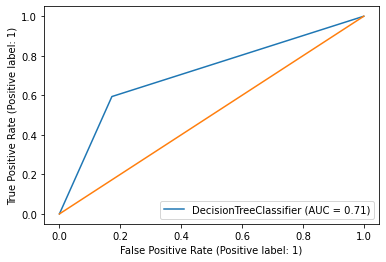

In [68]:
plot_roc_curve(classifier, xtest, ytest)
plt.plot([0,1],[0,1])

In [69]:
accuracy_score(ytest, pred)

0.7444444444444445

In [70]:
classifier.score(xtest, ytest)

0.7444444444444445

In [71]:
(tp+tn) / (tp+tn+fp+fn)

0.7444444444444445